In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [ ]:
#load the dataset
Data=pd.read_csv("anime.csv")
Data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
Data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
Data.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
Data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
Data.shape

(12294, 7)

In [ ]:
#check the null values
Data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
# Fill missing 'genre' and 'type' with 'Unknown'
Data['genre'] = Data['genre'].fillna('Unknown')
Data['type'] = Data['type'].fillna('Unknown')

#'rating' with the median value
Data['rating'] = Data['rating'].fillna(Data['rating'].median())

In [ ]:
Data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
Data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

# Feature Extraction

In [ ]:
#check the unique values of the genre column
Data['genre'].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3265, dtype: int64

In [ ]:
Data['genre'].value_counts().shape

(3265,)

In [ ]:
Data['episodes'].value_counts()

episodes
1      5677
2      1076
12      816
13      572
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: count, Length: 187, dtype: int64

In [ ]:
Data['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Unknown      25
Name: count, dtype: int64

<Axes: xlabel='type'>

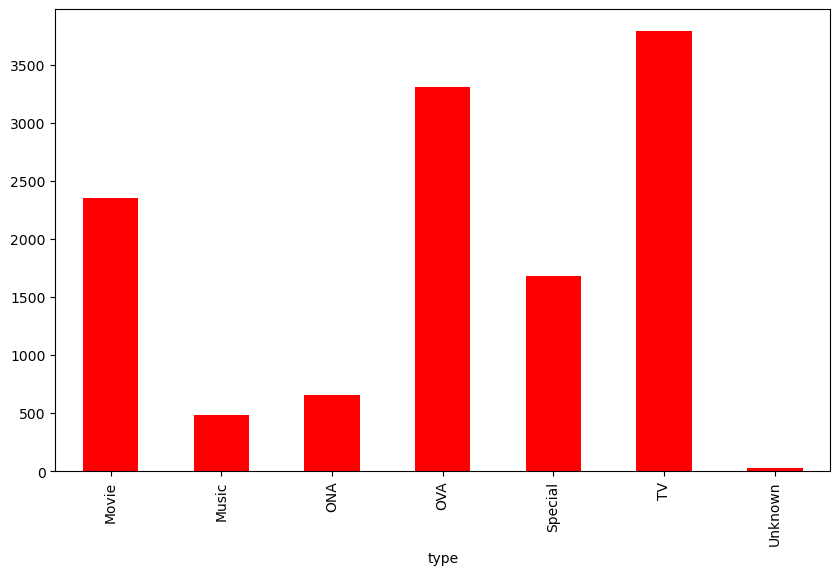

In [ ]:
#plot the bar chart

Data['type'].value_counts().sort_index().plot(kind='bar',color='red', figsize=(10,6))

In [ ]:
# Normalization of rating and converting categorical numeric (genre)
gerne_encoded= Data['genre'].str.get_dummies(sep=', ')

Scale = StandardScaler()
normal_rating = Scale.fit_transform(Data[['rating']])

# combine into a single DataFrame
feature_df = pd.concat([gerne_encoded, pd.DataFrame(normal_rating, columns=['norm_rating'])])
feature_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,norm_rating
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.286514
12290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.158704
12291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.568814
12292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.470498


In [ ]:
feature_df.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,norm_rating
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
genre_encoded =Data['genre'].str.get_dummies(sep=',')
genre_encoded

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Initialize the CountVectorizer
Vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
genre_matrix = Vectorizer.fit_transform(Data['genre'])

In [ ]:
genre_matrix.shape

(12294, 44)

In [ ]:
#Calculating Cosine Similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
cosine_similarity = 1 - pairwise_distances(genre_encoded.values,metric='cosine')

In [ ]:
cosine_similarity # This is similarity matrix - diagonal values are 1

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28571429, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
# normalising of rating.
Scale = StandardScaler()
normal_rating = Scale.fit_transform(Data[['rating']])

In [ ]:
# Combining feature
feature_df = pd.concat([gerne_encoded, pd.DataFrame(normal_rating, columns=['norm_rating'])],axis=1)

In [ ]:
feature_df

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,norm_rating
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2.845534
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2.737388
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.727556
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.648904
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.639073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2.286514
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2.158704
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.568814
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.470498


# Recommendation System:

In [ ]:
# computing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
Similarity_matrix = cosine_similarity(feature_df)

In [ ]:
# Recommendation Function
def Recommended_anime(anime_title, Similarity_matrix, Data, top_n=10):
    anime_idx = Data[Data['name'] == anime_title].index[0]
    Similarity_scores = list(enumerate(Similarity_matrix[anime_idx]))
    Similarity_scores = sorted(Similarity_scores, key=lambda x: x[1], reverse=True)
    Similar_anime_indices = [i[0] for i in Similarity_scores[1:top_n+1]]
    return Data['name'].iloc[Similar_anime_indices]

In [ ]:
Call = Recommended_anime("Kimi no Na wa.",Similarity_matrix, Data, top_n=5)
print("Recommedation For 'Kimi no Na wa.': ")
print(Call)

Recommedation For 'Kimi no Na wa.': 
208                        Kokoro ga Sakebitagatterunda.
504    Clannad: After Story - Mou Hitotsu no Sekai, K...
60                                    Hotarubi no Mori e
10                                  Clannad: After Story
219    Yahari Ore no Seishun Love Comedy wa Machigatt...
Name: name, dtype: object


In [ ]:
Call = Recommended_anime("Steins;Gate", Similarity_matrix, Data, top_n=5)
print("Recommedation For 'Steins;Gate	': ")
print(Call)

Recommedation For 'Steins;Gate	': 
59              Steins;Gate Movie: Fuka Ryouiki no Déjà vu
126                  Steins;Gate: Oukoubakko no Poriomania
196      Steins;Gate: Kyoukaimenjou no Missing Link - D...
9091                           Kaitei Toshi no Dekiru made
10414    Subarashii Sekai Ryokou: New York Tabi &quot;C...
Name: name, dtype: object


In [ ]:
Call = Recommended_anime("Under World", Similarity_matrix, Data, top_n=5)
print("Recommedation For 'Under World': ")
print(Call)

Recommedation For 'Under World': 
12287                          Tenshi no Habataki Jun
12288                                The Satisfaction
12260                         Hokenshitsu de Aimashou
12289    Toushindai My Lover: Minami tai Mecha-Minami
12267                                   Lovely Series
Name: name, dtype: object


# Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?
   
User-based collaborative filtering recommends items to a user by finding other users with similar preferences.It predicts the user's preferences based on what similar users liked.
Item-based collaborative filtering, on the other hand, recommends items by identifying items that are similar to the ones the user has liked in the past. It focuses on the relationships between items rather than between users.

3. What is collaborative filtering, and how does it work?
   
Collaborative filtering is a recommendation technique that predicts a user's preferences by leveraging the preferences of other users. It works by finding patterns in user behavior, such as ratings or interactions, to suggest items that similar users or items might like.
There are two main types:
User-based: Recommends items liked by users with similar preferences.
Item-based: Recommends items similar to those a user has already liked.